In [1]:
# Based on https://www.kaggle.com/siebenrock/financial-exploration-analysis-and-visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.finance import candlestick2_ohlc
# from mplfinance import candlestick_ohlc
# import seaborn as sns
from datetime import datetime

In [2]:
coins = {
    "BTC": "Bitcoin"
}

coin_df = pd.read_csv(f'Data/coin_{coins["BTC"]}.csv')
coin_df.index = pd.to_datetime(coin_df['Date']).dt.date
coin_df.index = pd.DatetimeIndex(coin_df.index)
# coin_df['Date'] = pd.to_datetime(coin_df['Date'])
coin_df.drop('Date', axis=1, inplace=True)
coin_df.drop('SNo', axis=1, inplace=True)

coin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2862 entries, 2013-04-29 to 2021-02-27
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       2862 non-null   object 
 1   Symbol     2862 non-null   object 
 2   High       2862 non-null   float64
 3   Low        2862 non-null   float64
 4   Open       2862 non-null   float64
 5   Close      2862 non-null   float64
 6   Volume     2862 non-null   float64
 7   Marketcap  2862 non-null   float64
dtypes: float64(6), object(2)
memory usage: 201.2+ KB


In [3]:
print("BTC", coin_df.index[0])  # Print date of oldest data we have
print("BTC", coin_df.index[-1]) # Print date of most recent data we have

BTC 2013-04-29 00:00:00
BTC 2021-02-27 00:00:00


In [4]:
coin_df.head()

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,
2013-04-29,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [5]:
coin_df.tail()

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,
2021-02-23,Bitcoin,BTC,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2021-02-24,Bitcoin,BTC,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2021-02-25,Bitcoin,BTC,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2021-02-26,Bitcoin,BTC,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11
2021-02-27,Bitcoin,BTC,48253.270101,45269.025766,46344.772237,46188.451275,4.591095e+10,8.609781e+11


In [6]:
highest = coin_df.xs(key='High', axis=1).max()
print("Highest Price:", highest)
lowest = coin_df.xs(key='Low', axis=1).min()
print("Lowest Price:", lowest)

Highest Price: 58330.57214185
Lowest Price: 65.5260009765625


In [7]:
returns = pd.DataFrame(index=coin_df.index)
returns['btc_return'] = coin_df['Close'].pct_change()

In [8]:
# returns.index[0]
returns.loc['2013-04-29']

btc_return   NaN
Name: 2013-04-29 00:00:00, dtype: float64

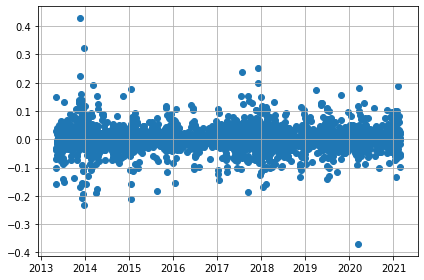

In [9]:
X = returns.index
Y = returns['btc_return']
plt.scatter(X, Y)
plt.tight_layout()
plt.grid()
plt.show()

In [10]:
test = pd.DataFrame(index=coin_df.index)
test['Open'] = coin_df['Open']
test['btc_return'] = returns['btc_return']
test.head()

,Open,btc_return
Date,,
2013-04-29,134.444000,NaN
2013-04-30,144.000000,-0.038328
2013-05-01,139.000000,-0.158345
2013-05-02,116.379997,-0.100692
2013-05-03,106.250000,-0.070906


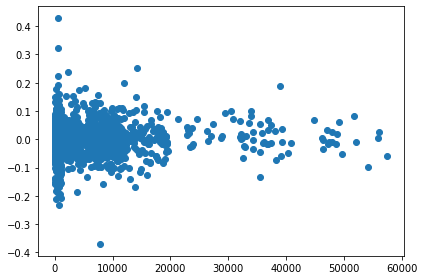

In [11]:
plt.scatter(test['Open'], test['btc_return'])
plt.tight_layout()
plt.show()